# Chicago Crime Analysis 2010-2024

---
## Data Cleaning

In [111]:
#Dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

In [112]:
# Load the crime data into a DataFrame
crime_df = pd.read_csv("data/Crimes_-_2010_to_2024.csv")

# Display sample data
crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Logitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [113]:
# Get a list of all of our columns for easy reference
crime_df.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Logitude ',
       'Location'],
      dtype='object')

In [114]:
# Use .rename(columns={}) to rename the Longitude column (fix typo and remove space at end)
renamed_columns_crime_df = crime_df.rename(columns={"Logitude ":"Longitude"})
renamed_columns_crime_df.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,7823660,HS634379,11/19/10 9:00,076XX S ABERDEEN ST,320,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,...,17.0,71,3,1170306.0,1854179.0,2010,9/14/23 15:41,41.755353,-87.651440,"(41.755353249, -87.651440192)"
1,12850000,JF423109,11/24/10 0:00,046XX S SPAULDING AVE,1752,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,...,12.0,58,17,1155157.0,1873719.0,2010,9/19/23 15:41,41.809290,-87.706436,"(41.809289985, -87.706435685)"
2,12422166,JE300051,6/1/10 0:00,063XX S CALIFORNIA AVE,1563,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,...,16.0,66,17,NaN,NaN,2010,9/20/23 15:41,NaN,NaN,NaN
3,7420190,HS221724,3/23/10 12:36,045XX S FORRESTVILLE AVE,261,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,...,3.0,38,2,1180700.0,1875059.0,2010,9/23/23 15:41,41.812418,-87.612708,"(41.812417562, -87.61270782)"
4,7686289,HS492280,8/31/10 17:00,027XX S INDIANA AVE,281,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,...,4.0,35,2,1178044.0,1886556.0,2010,9/29/23 15:41,41.844027,-87.622101,"(41.844026941, -87.622100808)"


In [115]:
# Clean the data by removing unnecessary columns: Case Number, IUCR, Beat, District, \
#                       Community Area, FBI Code, X Coordinate, Y Coordinate, and Location 

reduced_columns_crime_df = renamed_columns_crime_df.loc[:, ["ID", "Date", "Block", "Primary Type", \
       "Description", "Location Description", "Arrest", "Domestic", \
        "Ward", "Year", "Updated On", "Latitude", "Longitude"]]
reduced_columns_crime_df.head()

,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Longitude
0,7823660,11/19/10 9:00,076XX S ABERDEEN ST,ROBBERY,STRONG ARM - NO WEAPON,RESIDENCE,True,False,17.0,2010,9/14/23 15:41,41.755353,-87.651440
1,12850000,11/24/10 0:00,046XX S SPAULDING AVE,OFFENSE INVOLVING CHILDREN,AGGRAVATED CRIMINAL SEXUAL ABUSE BY FAMILY MEMBER,RESIDENCE,False,True,12.0,2010,9/19/23 15:41,41.809290,-87.706436
2,12422166,6/1/10 0:00,063XX S CALIFORNIA AVE,SEX OFFENSE,CRIMINAL SEXUAL ABUSE,APARTMENT,True,False,16.0,2010,9/20/23 15:41,NaN,NaN
3,7420190,3/23/10 12:36,045XX S FORRESTVILLE AVE,CRIMINAL SEXUAL ASSAULT,AGGRAVATED - HANDGUN,STREET,False,False,3.0,2010,9/23/23 15:41,41.812418,-87.612708
4,7686289,8/31/10 17:00,027XX S INDIANA AVE,CRIMINAL SEXUAL ASSAULT,NON-AGGRAVATED,APARTMENT,False,True,4.0,2010,9/29/23 15:41,41.844027,-87.622101


---
# Data Analysis

## What are the 6 most common crimes in Chicago from 2010-2024?

In [116]:
# Retrieve the 6 most frequent values in the "Primary Type" column

top_crime_list_df=reduced_columns_crime_df['Primary Type'].value_counts().head(6)

print(top_crime_list_df)

Primary Type
THEFT                  55862
BATTERY                42224
CRIMINAL DAMAGE        26437
MOTOR VEHICLE THEFT    22352
ASSAULT                21563
DECEPTIVE PRACTICE     17606
Name: count, dtype: int64


## Which wards are most & least affected by these crimes?

In [117]:
# Define the list of top crime types
top_crimes = [
    "THEFT",
    "BATTERY",
    "CRIMINAL DAMAGE",
    "MOTOR VEHICLE THEFT",
    "ASSAULT",
    "DECEPTIVE PRACTICE"
]

# Filter the DataFrame to include only the rows with top crime types
top_crime_df = reduced_columns_crime_df[reduced_columns_crime_df["Primary Type"].isin(top_crimes)]

# Display the first few rows of the filtered DataFrame
top_crime_df.head()


,ID,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Ward,Year,Updated On,Latitude,Longitude
15,13263907,6/1/10 0:00,051XX S HARPER AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER (SPECIFY),False,False,4.0,2010,11/3/23 15:41,NaN,NaN
20,13299775,12/1/10 12:40,114XX S EMERALD AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,21.0,2010,12/7/23 15:41,NaN,NaN
21,13301698,1/1/10 23:50,082XX S CALUMET AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,RESIDENCE,False,False,6.0,2010,12/9/23 15:42,NaN,NaN
25,13312982,6/22/10 0:01,085XX S RHODES AVE,THEFT,OVER $500,RESIDENCE,False,False,6.0,2010,12/20/23 15:41,NaN,NaN
30,11345276,6/2/10 12:00,080XX S CHAPPEL AVE,THEFT,$500 AND UNDER,STREET,False,True,8.0,2010,9/7/21 15:41,NaN,NaN


In [118]:
# Retrieve the 5 Wards most affected by the top 6 crimes

ward_most_affected_by_top_crime_df=top_crime_df['Ward'].value_counts().head(5)
print(ward_most_affected_by_top_crime_df)

    

Ward
27.0    8110
28.0    7540
6.0     6638
42.0    6494
4.0     5832
Name: count, dtype: int64


In [119]:
# Retrieve the 5 Wards least affected by the top 6 crimes

ward_least_affected_by_top_crime_df=top_crime_df['Ward'].value_counts().tail(5)
print(ward_least_affected_by_top_crime_df)


Ward
45.0    2027
13.0    1981
19.0    1914
23.0    1875
38.0    1645
Name: count, dtype: int64


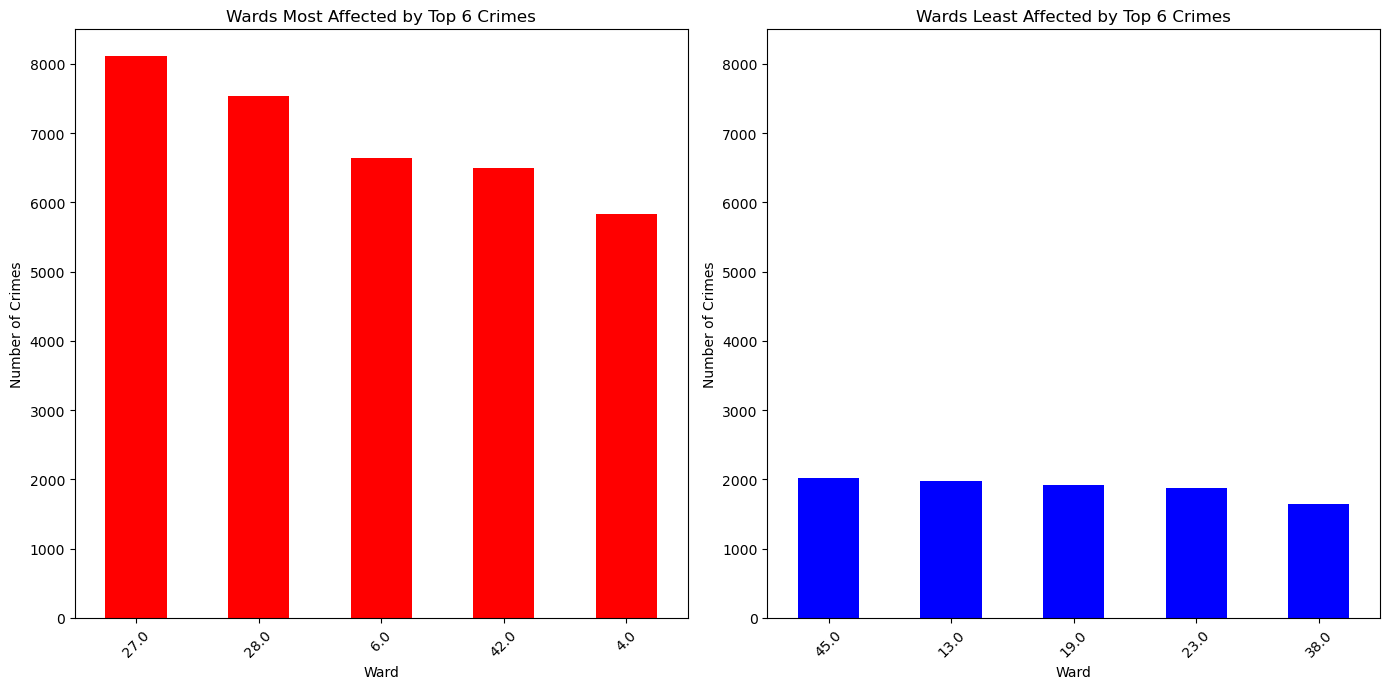

In [120]:
# Plot the most and least affected ward's crime counts
plt.figure(figsize=(14, 7))

# Most affected wards
plt.subplot(1, 2, 1)
ward_most_affected_by_top_crime_df.plot(kind='bar', color='red')
plt.title('Wards Most Affected by Top 6 Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.ylim(0, 8500)
plt.xticks(rotation=45)

# Least affected wards
plt.subplot(1, 2, 2)
ward_least_affected_by_top_crime_df.plot(kind='bar', color='blue')
plt.title('Wards Least Affected by Top 6 Crimes')
plt.xlabel('Ward')
plt.ylabel('Number of Crimes')
plt.ylim(0, 8500)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## Is there a correlation between instance of crime and ward?

In [121]:
#Generate a Chi Square test to assess if there is a statistically significant \
# correlation between crime counts and wards.

# Prepare data: Aggregate crime instances by ward
ward_crime_counts_df = top_crime_df['Ward'].value_counts().reset_index()
ward_crime_counts_df.columns = ['Ward', 'Crime_Count']

# Check the DataFrame
print(ward_crime_counts_df.head())

# Create a contingency table
# Since each ward is a category and the crime count is a numeric value, we can use the counts directly
# Create a DataFrame with the count of crimes for each ward and treat this as our contingency table

# Add a column for counts
ward_crime_counts_df['Count'] = 1

# Create contingency table of wards and their crime counts
contingency_table = pd.crosstab(index=ward_crime_counts_df['Ward'], columns=ward_crime_counts_df['Count'])

# Perform Chi-Square Test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Display results
print("Chi-Square Test Results:")
print(f"Chi-Square Statistic: {chi2:.2f}")
print(f"P-Value: {p:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies:\n{expected}")

# Interpretation
alpha = 0.05  # Significance level
if p < alpha:
    print(f"Reject the null hypothesis: There is a significant association between wards and crime counts (p < {alpha}).")
else:
    print(f"Fail to reject the null hypothesis: No significant association between wards and crime counts (p >= {alpha}).")


   Ward  Crime_Count
0  27.0         8110
1  28.0         7540
2   6.0         6638
3  42.0         6494
4   4.0         5832
Chi-Square Test Results:
Chi-Square Statistic: 0.00
P-Value: 1.0000
Degrees of Freedom: 0
Expected Frequencies:
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]
Fail to reject the null hypothesis: No significant association between wards and crime counts (p >= 0.05).


## Which Location types show the highest rate of crime?

In [122]:
# Retrieve the 5 Locations most affected by the top 6 crimes

location_most_affected_by_top_crime_df=top_crime_df['Location Description'].value_counts().head(5)
print(location_most_affected_by_top_crime_df)

Location Description
STREET                                    51986
APARTMENT                                 35590
RESIDENCE                                 21459
SIDEWALK                                   7549
PARKING LOT / GARAGE (NON RESIDENTIAL)     7219
Name: count, dtype: int64


In [123]:
# Retrieve the 5 Locations least affected by the top 6 crimes

location_least_affected_by_top_crime_df=top_crime_df['Location Description'].value_counts().tail(5)
print(location_least_affected_by_top_crime_df)

Location Description
CASINO/GAMBLING ESTABLISHMENT                      2
CTA TRACKS - RIGHT OF WAY                          1
VEHICLE - COMMERCIAL: ENTERTAINMENT / PARTY BUS    1
SCHOOL, PRIVATE, BUILDING                          1
FARM                                               1
Name: count, dtype: int64


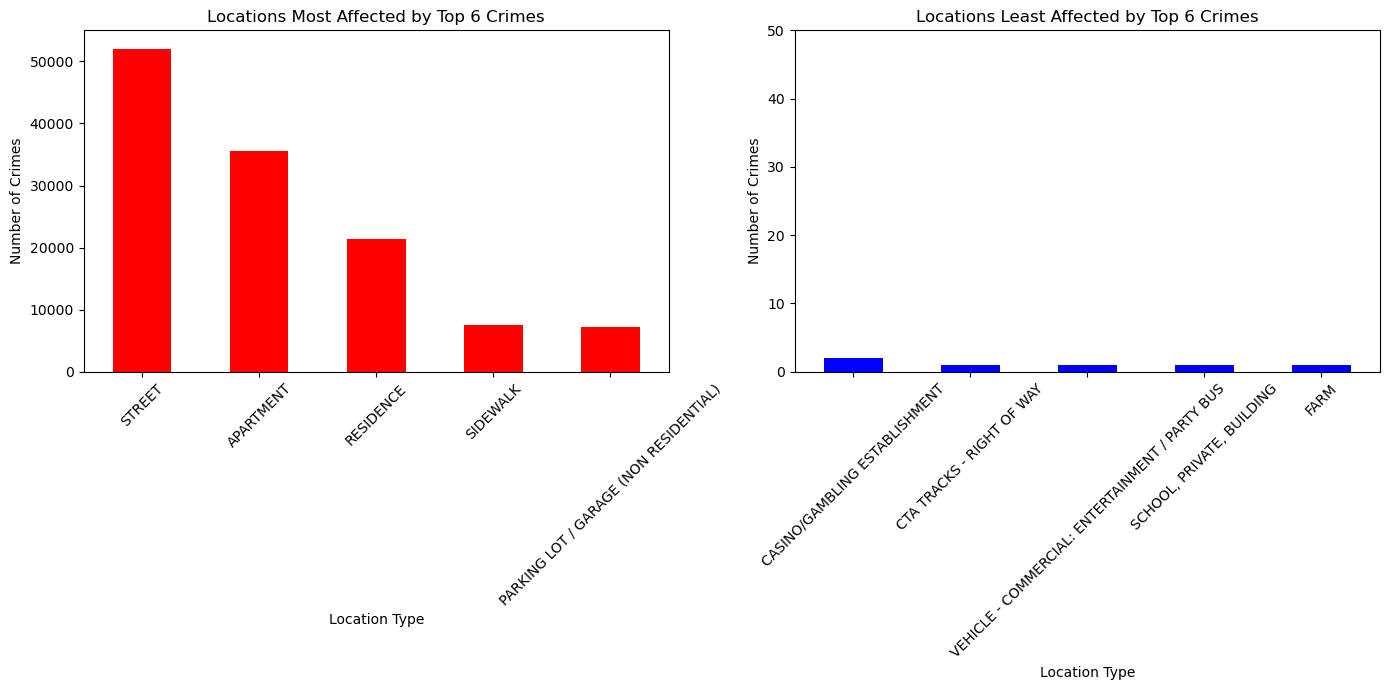

In [124]:
# Plot the most and least affected location's crime counts.
plt.figure(figsize=(14, 7))

# Most affected wards
plt.subplot(1, 2, 1)
location_most_affected_by_top_crime_df.plot(kind='bar', color='red')
plt.title('Locations Most Affected by Top 6 Crimes')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.ylim(0, 55000)
plt.xticks(rotation=45)

# Least affected wards
plt.subplot(1, 2, 2)
location_least_affected_by_top_crime_df.plot(kind='bar', color='blue')
plt.title('Locations Least Affected by Top 6 Crimes')
plt.xlabel('Location Type')
plt.ylabel('Number of Crimes')
plt.ylim(0, 50)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## How do arrest rates compare to crime rates?

Arrest Rates for Top 6 Crimes (as percentages):
          Primary Type  Total_Crimes  Total_Arrests  Arrest_Rate
1              BATTERY         42224           6970    16.507200
0              ASSAULT         21563           2218    10.286138
5                THEFT         55862           3265     5.844760
2      CRIMINAL DAMAGE         26437            870     3.290842
3   DECEPTIVE PRACTICE         17606            558     3.169374
4  MOTOR VEHICLE THEFT         22352            701     3.136185


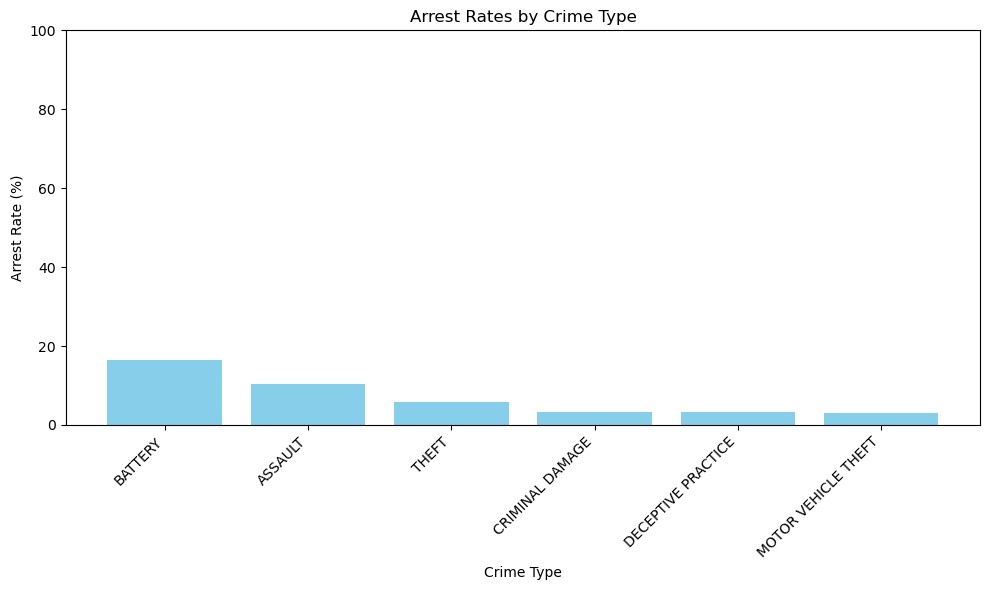

In [125]:
# Calculate arrest rates for the top 6 crimes
# Group by 'Primary Type' and calculate the number of crimes and arrests
crime_arrest_rate_df = top_crime_df.groupby('Primary Type').agg(
    Total_Crimes=('Primary Type', 'size'),
    Total_Arrests=('Arrest', 'sum')
).reset_index()

# Calculate the arrest rate as the proportion of arrests for each crime type
crime_arrest_rate_df['Arrest_Rate'] = (crime_arrest_rate_df['Total_Arrests'] / crime_arrest_rate_df['Total_Crimes']) * 100

# Sort by arrest rate for better comparison
crime_arrest_rate_df = crime_arrest_rate_df.sort_values(by='Arrest_Rate', ascending=False)

# Display the results with arrest rate as percentage
print("Arrest Rates for Top 6 Crimes (as percentages):")
print(crime_arrest_rate_df)

# Plotting the data
plt.figure(figsize=(10, 6))

# Bar plot for arrest rates by crime type
plt.bar(crime_arrest_rate_df['Primary Type'], crime_arrest_rate_df['Arrest_Rate'], color='skyblue')
plt.xlabel('Crime Type')
plt.ylabel('Arrest Rate (%)')
plt.title('Arrest Rates by Crime Type')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 100)  # Adjust y-axis to show the percentage from 0 to 100

plt.tight_layout()
plt.show()


How have arrest rates changed from 2022 to 2023?

0 invalid date(s) found
Monthly Arrest Rates for 2022 and 2023:
      Arrest_Rate           
Year         2022       2023
Month                       
1       20.918367  24.733475
2       24.444444  22.933333
3       25.563910  27.839644
4       31.325301  26.126126
5       30.769231  26.679104
6       19.457014  19.142420
7       22.362869  22.588832
8       27.155172  20.989399
9       22.619048  11.494919
10      26.666667  11.557680
11      16.216216  11.899517
12       7.481163  11.945360

Monthly Change in Arrest Rate from 2022 to 2023:
      Change_in_Arrest_Rate
Year                       
Month                      
1                  3.815108
2                 -1.511111
3                  2.275734
4                 -5.199175
5                 -4.090126
6                 -0.314594
7                  0.225963
8                 -6.165773
9                -11.124129
10               -15.108987
11                -4.316699
12                 4.464198


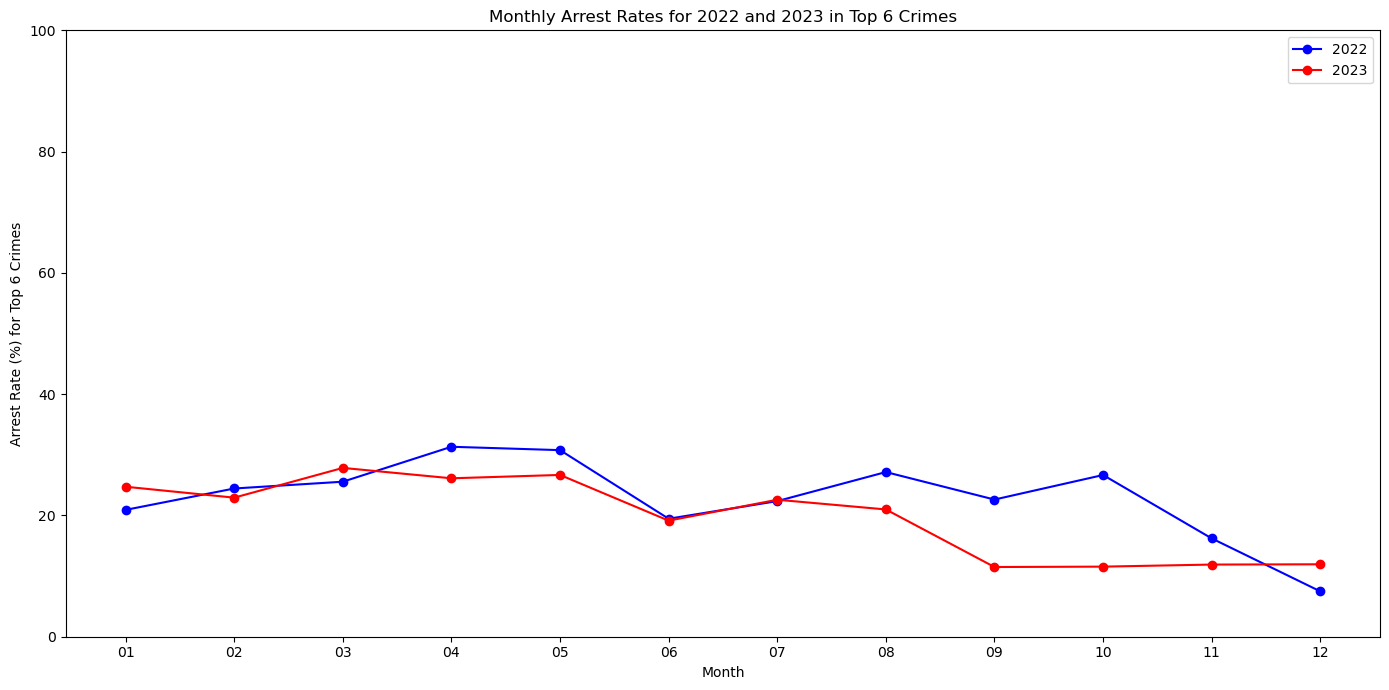

In [126]:

# Ensure 'Date' column is in datetime format with the correct format string
# Based on the error message, the correct format is '%m/%d/%y %H:%M'
reduced_columns_crime_df['Date'] = pd.to_datetime(reduced_columns_crime_df['Date'], format='%m/%d/%y %H:%M', errors='coerce')

# Check if there are any invalid dates after conversion
print(reduced_columns_crime_df['Date'].isna().sum(), "invalid date(s) found")

# Extract 'Month' and 'Year' from 'Date'
reduced_columns_crime_df['Month'] = reduced_columns_crime_df['Date'].dt.month
reduced_columns_crime_df['Year'] = reduced_columns_crime_df['Date'].dt.year

# Filter data for 2022 and 2023
data_2022_2023_monthly_df = reduced_columns_crime_df[reduced_columns_crime_df['Year'].isin([2022, 2023])]

# Calculate total number of crimes and arrests per month for each year
monthly_crime_arrest_df = data_2022_2023_monthly_df.groupby(['Year', 'Month']).agg(
    Total_Crimes=('Primary Type', 'size'),
    Total_Arrests=('Arrest', 'sum')
).reset_index()

# Pivot the table to have months as columns and years as rows
monthly_crime_arrest_pivot_df = monthly_crime_arrest_df.pivot(index='Month', columns='Year', values=['Total_Crimes', 'Total_Arrests'])

# Calculate monthly arrest rates
monthly_crime_arrest_pivot_df[('Arrest_Rate', 2022)] = (monthly_crime_arrest_pivot_df[('Total_Arrests', 2022)] / monthly_crime_arrest_pivot_df[('Total_Crimes', 2022)]) * 100
monthly_crime_arrest_pivot_df[('Arrest_Rate', 2023)] = (monthly_crime_arrest_pivot_df[('Total_Arrests', 2023)] / monthly_crime_arrest_pivot_df[('Total_Crimes', 2023)]) * 100

# Calculate the change in arrest rate month-to-month
monthly_crime_arrest_pivot_df['Change_in_Arrest_Rate'] = monthly_crime_arrest_pivot_df[('Arrest_Rate', 2023)] - monthly_crime_arrest_pivot_df[('Arrest_Rate', 2022)]

# Display the results
print("Monthly Arrest Rates for 2022 and 2023:")
print(monthly_crime_arrest_pivot_df[['Arrest_Rate']])

print("\nMonthly Change in Arrest Rate from 2022 to 2023:")
print(monthly_crime_arrest_pivot_df[['Change_in_Arrest_Rate']])

# Plotting the data
plt.figure(figsize=(14, 7))

# Plot monthly arrest rates for each year
plt.plot(monthly_crime_arrest_pivot_df.index, monthly_crime_arrest_pivot_df[('Arrest_Rate', 2022)], marker='o', label='2022', color='blue')
plt.plot(monthly_crime_arrest_pivot_df.index, monthly_crime_arrest_pivot_df[('Arrest_Rate', 2023)], marker='o', label='2023', color='red')

plt.xlabel('Month')
plt.ylabel('Arrest Rate (%) for Top 6 Crimes')
plt.title('Monthly Arrest Rates for 2022 and 2023 in Top 6 Crimes')
plt.legend()
plt.xticks(monthly_crime_arrest_pivot_df.index, [f'{m:02d}' for m in monthly_crime_arrest_pivot_df.index])
plt.ylim(0, 100)  # Adjust y-axis to show the percentage from 0 to 100

plt.tight_layout()
plt.show()

